# Eulers metode
__Creative Commons BY-SA : bitjungle (Rune Mathisen) og fuzzbin (Tom Jarle Christiansen)__

<hr/>
<img alt="Opphavsmann: Mestigoit Lisens: Creative Commons BY-SA 3.0 Unported" title="Opphavsmann: Stefan Walkowski Lisens: Creative Commons BY-SA 4.0 Unported" style="width: 200px; float: right; margin-left: 30px;" src="img/Euler.png">

__[Eulers metode](https://en.wikipedia.org/wiki/Euler_method) er en algoritme for å finne numeriske løsninger til [ordinære differensialligninger](https://en.wikipedia.org/wiki/Ordinary_differential_equation). I naturvitenskapen beskriver slike likninger som oftest en størrelse og endringen av denne størrelsen over tid. Eksempler på dette kan være populasjonsvekst i en bakteriekultur eller fartsendring til et objekt som faller i et gravitsjonsfelt. Eulers metode brukes for å finne [numeriske løsninger](https://no.wikipedia.org/wiki/Numerisk_analyse)  på slike problemer når du kjenner en initialverdi.__

> Denne siden dekker helt eller delvis kompetansemålene: [Matematiske metoder 1](https://github.com/fagstoff/ProgMod/blob/master/L%C3%A6replan/kompetansem%C3%A5l.md#modellering)




<img alt="Opphavsmann: Mestigoit Lisens: Creative Commons BY-SA 3.0 Unported" title="Opphavsmann: Mestigoit Lisens: Creative Commons BY-SA 3.0 Unported" style="width: 200px; float: right; margin-left: 30px;" src="img/Mycobacterium_smegmatis.jpg">

La oss si at vi har en funksjon $y$ og differensiallikningen $ y' = y $. Vi har i tillegg initialbetingelsen $ y(0) = 1 $. Dette kan for eksempel være en beskrivelse av eksponentiell vekst i en bakteriekultur, hvor vi vet antall bakterier vi starter med ved tidspunktet $ t = 0 $.

Vi ønsker nå å bruke Eulers metode for å finne denne verdien numerisk. For å få til dette må vi starte et sted som vi vet noe om. I dette tilfellet bruker vi initialbetingelsen $ y(0) = 1 $, og starter derifra. Vi må også bestemme oss for en $ \Delta t $ som er hvor store "skritt" vi skal ta mellom hver beregning.

__Grunnprinsippet er at hver nye verdi beregnes med utgangspunkt i den forrige.__

Vi tar utgangspunkt i $ y' = y $, og vet at $y$ på nå-tidspunktet er en funksjon av forrige $y$ og tiden $t$:

$$ \frac{\Delta y}{\Delta t} = f(t_n,y_n) $$

Her er $\Delta y$ forskjellen mellom foregående og neste y-verdi, når vi har beveget oss med tidsskrittet $\Delta t$.  Vi kan skrive det som:

$$ \frac{y_{n+1} - y_n}{\Delta t} = f(t_n,y_n) $$

Vi gjør om slik at vi får et uttrykk for neste y-verdi:

$$ y_{n+1} = y_n + \Delta t \cdot f(t_n,y_n) $$

I dette tilfellet vet vi også at $ f(t_n,y_n) $ er $y'_n = y_n$.

$$ y_{n+1} = y_n + \Delta t \cdot y_n $$

Vi skal nå regne ut $y'(0)$ med utgangspunkt i initialbetingelsen. Vi vet at $y'= y$ og $y(0) = 1$. Dette betyr at $y'(0)=1$.

Neste skritt er å øke $t$ med $\Delta t$ og regne ut en gang til. Vi lar $\Delta t = 1$

$$y(1) = y(0) + \Delta x \cdot y(0) = 1 + 1 \cdot 1 = 2$$

Vi kan nå bruke dette resultatet til å regne ut neste verdi:
$$y(2) = y(1) + \Delta t \cdot y(1) = 2 + 1 \cdot 2 = 4$$

Slik kan vi fortsette helt til vi har regnet ut $y(5)$ som i tabellen under.

|$t$ |$y$ |$y'$|
|:--:|:--:|:--:|
|0|1|1|
|1|2|2|
|2|4|4|
|3|8|8|
|4|16|16|
|5|32|32|

I dette eksemplet har vi ikke sagt noe om hvordan funksjonen $y$ ser ut. Det er en eksponentialfunksjon $e^x$. Siden vi her kjenner den virkelige funksjonen, kan vi sammenlikne våre numeriske tilnærminger med de virkelige verdiene. Startverdien $y_0$ er en konstant som multipliseres med eksponentialfunksjonen.

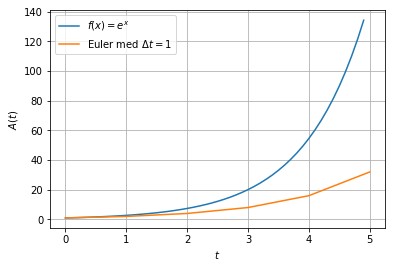

In [18]:
# Importerer nødvendige biblioteker
import matplotlib.pyplot as plt
import numpy as np

# Initialbetingelser
y0 = 1
delta_t = 1

# For hvilken t skal beregningene stoppe?
max_t = 5

# Eksakt løsning
def A(x, k):
    return k * np.exp(x)

# Eulers metode for denne spesifikke problemstillingen
def next_y(t, yn):
    return yn + t * yn

# x-verdier for plotting av eksakt løsning
x = np.arange(0, max_t, 0.1)
y = []

# Regner ut eksakt løsning
for i in x:
    y.append(A(i, y0))

# x-verdier for plotting av Euler
xe = np.arange(0, max_t, delta_t).tolist()

# Initialiserer med startverdien for ye
ye = [y0] 

# Bruker Eulers metode for å regne ut neste y-verdi
for verdi in xe:
    ye.append(next_y(delta_t, ye[-1]))

# Legger til den siste x-verdien
xe.append(xe[-1] + delta_t)

# Utskrift av data
plt.grid() # Lager rutenett
plt.xlabel('$t$') # Merker x-aksen
plt.ylabel('$A(t)$') # Merker y-aksen
plt.plot(x, y, label='$f(x)=e^x$')
plt.plot(xe, ye, label='Euler med $\Delta t={}$'.format(delta_t))
plt.legend()
plt.show()

## Oppsummering

Gitt at vi har en førsteordens lineær differensiallikning:
$$ \frac{dy}{dx} = f(x,y) $$

Vi har også gitt initialbetingelsene: 
$$ y(x_0) = y_0 $$

Med Eulers metode kan vi nå finne estimater for neste x og y:
$$ x_{n+1} = x_n + \Delta x $$
$$ y_{n+1} = y_n + \Delta x \cdot f(x,y) $$

## Oppgaver

1. Ta utgangspunkt i eksempelet over. Endre på step-verdien $\Delta x$, gjør den gradvis mindre og mindre (la den nærme seg 0). Hva observerer du?
2. Kan du løse differensiallikningen $\frac{dy}{dx}=x+2y$ numerisk når $y(0)=0$? Bruk $\Delta x = 0.1$. Finn eksakt løsning med f.eks [Wolfram Alpha](http://www.wolframalpha.com), og sammenlign med funksjonen du kommer frem til.